<div style="text-align: center;">
    <h1 style="font-size:26px;">ENTRENAMIENTO Y EVALUACIÓN PARA DATOS COMPLETOS</h1>
</d>

In [1]:
# Importar librerías necesarias
import pandas as pd  # Para manejar los datos
import numpy as np  # Para operaciones numéricas
import pickle #Para guardar los modelos
import warnings #Elimina mensajes de alerta
warnings.simplefilter("ignore")

# Modelos supervisados de clasificación
from sklearn.linear_model import LogisticRegression  # Regresión logística
from sklearn.tree import DecisionTreeClassifier  # Árbol de decisión
from sklearn.ensemble import RandomForestClassifier  # Bosque aleatorio
from sklearn.ensemble import GradientBoostingClassifier # GBM

# Metricas de evaluacion de los modelos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Division de la Dataset
from sklearn.model_selection import train_test_split  # Para dividir el dataset en entrenamiento y prueba

# Visualización de datos
import matplotlib.pyplot as plt  # Para gráficos
import seaborn as sns  # Para gráficos más complejos

#### REALIZAMOS LA LECTURA DE NUESTROS DATOS PREPARADOS DE MAQUINARIA INDUSTRIAL

In [2]:
base = pd.read_csv('PREPARACION_DATOS.csv', delimiter=',')
base.head(5)

,Type_H,Type_L,Type_M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine Failure
0,0,0,1,298.1,308.6,1551,42.8,0,0
1,0,1,0,298.2,308.7,1408,46.3,3,0
2,0,1,0,298.1,308.5,1498,49.4,5,0
3,0,1,0,298.2,308.6,1433,39.5,7,0
4,0,1,0,298.2,308.7,1408,40.0,9,0


#### DIVISION DE LOS DATOS PARA EL ENTRENAMIENTO Y PRUEBA

##### SEPARACION DE LAS CARACTERISTICAS DE LA DATA "X" Y DE LA ETIQUETA "Y"

In [3]:
# Separar las características (X) y la columna objetivo (y)
X = base.drop(columns=['Machine Failure'])  # Eliminar la columna 'Machine Failure' de X
y = base['Machine Failure']  # Asignar 'Machine Failure' a y

In [4]:
# Definir las columnas y la lista para almacenar resultados
columnas = ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]',
            'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
            'Tool wear [min]']

# Dividir los datos una sola vez en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(base[columnas], y, test_size=0.2, random_state=42)


In [5]:
# Ver la distribución de clases datos completos
print("\nDistribución de clases datos completos:")
print(y.value_counts())


Distribución de clases datos completos:
Machine Failure
0    9661
1     339
Name: count, dtype: int64


#### REGRESION LOGISTICA

In [6]:
#listas para almacenar resultados
resultados = {}
col_modelo = []

# Iterar sobre las columnas, acumulándolas en `col_modelo`
for col in columnas:
    col_modelo.append(col)
    
    # Crear subconjuntos de X_train y X_test usando solo las columnas actuales
    X_train_subset = X_train[col_modelo]
    X_test_subset = X_test[col_modelo]

    # Crear el modelo de regresión logística y entrenarlo
    log_reg = LogisticRegression()
    log_reg.fit(X_train_subset, y_train)

    # Realizar las predicciones en el conjunto de prueba
    y_pred = log_reg.predict(X_test_subset)

    # Calcular y almacenar la precisión
    accuracy = accuracy_score(y_test, y_pred)
    resultados[tuple(col_modelo)] = accuracy

    # Imprimir el resultado de la iteración
    print(f'Columnas usadas: {col_modelo}, Exactitud: {accuracy:.4f}')


Columnas usadas: ['Type_H'], Exactitud: 0.9695
Columnas usadas: ['Type_H', 'Type_L'], Exactitud: 0.9695
Columnas usadas: ['Type_H', 'Type_L', 'Type_M'], Exactitud: 0.9695
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]'], Exactitud: 0.9695
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]'], Exactitud: 0.9695
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]'], Exactitud: 0.9695
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]'], Exactitud: 0.9750
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], Exactitud: 0.9740


In [7]:
# Evaluar la precisión en el conjunto de entrenamiento
train_accuracy1 = accuracy_score(y_train, log_reg.predict(X_train))
print(f"Accuracy del entrenamiento : {train_accuracy1*100:.2f} %")

# Realizar las predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Evaluar la precisión en el conjunto de prueba
test_accuracy1 = accuracy_score(y_test, y_pred)
print(f"Accuracy del algoritmo: {test_accuracy1*100:.2f} %")

# Imprimir el informe de clasificación
print("\nInforme de clasificación :")
class_report1= classification_report(y_test, y_pred, output_dict=True)

# Convertir el informe de clasificación en un DataFrame de pandas
report_df1 = pd.DataFrame(class_report1).transpose()

# Mostrar solo las métricas de las clases (eliminamos la fila 'accuracy')
report_df1 = report_df1.drop('accuracy', axis=0)

# Imprimir el resumen con las métricas por clase en formato de tabla
report_df1

Accuracy del entrenamiento : 96.92 %
Accuracy del algoritmo: 97.40 %

Informe de clasificación :


,precision,recall,f1-score,support
0,0.978206,0.995358,0.986708,1939.0
1,0.666667,0.295082,0.409091,61.0
macro avg,0.822436,0.645220,0.697899,2000.0
weighted avg,0.968704,0.974000,0.969090,2000.0


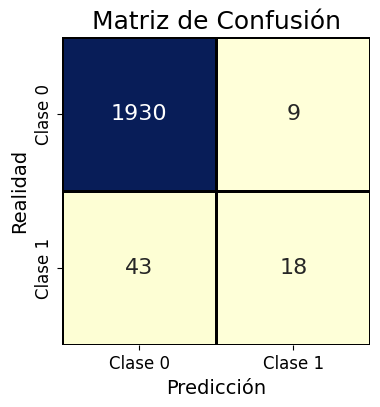

In [8]:
# Calcular la matriz de confusión
cm1 = confusion_matrix(y_test, y_pred)

# Crear el gráfico de la matriz de confusión con nuevo estilo
plt.figure(figsize=(6, 4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'],
            cbar=False, linewidths=1, linecolor='black', square=True, annot_kws={"size": 16})

# Títulos y etiquetas
plt.title('Matriz de Confusión', fontsize=18)
plt.xlabel('Predicción', fontsize=14)
plt.ylabel('Realidad', fontsize=14)

# Ajustar el tamaño de la fuente en los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

In [9]:
# Extraer valores de la matriz de confusión
TN1 = cm1[0, 0]  # Verdaderos Negativos
FP1 = cm1[0, 1]  # Falsos Positivos

# Calcular la especificidad
especificidad1 = TN1/ (TN1 + FP1)

# Imprimir el resultado
print(f"Especificidad: {especificidad1}")

Especificidad: 0.9953584321815369


### ARBOLES DE DESCISIONES

In [10]:
#listas para almacenar resultados
resultados = {}
col_modelo = []

# Iterar sobre las columnas, acumulándolas en `col_modelo`
for col in columnas:
    col_modelo.append(col)
    
    # Crear subconjuntos de X_train y X_test usando solo las columnas actuales
    X_train_subset = X_train[col_modelo]
    X_test_subset = X_test[col_modelo]

    # Crear el modelo de Árbol de Decisión y entrenarlo
    tree_model = DecisionTreeClassifier(random_state=42)
    tree_model.fit(X_train_subset, y_train)

    # Realizar las predicciones en el conjunto de prueba
    y_pred = tree_model.predict(X_test_subset)

    # Calcular y almacenar la precisión
    accuracy = accuracy_score(y_test, y_pred)
    resultados[tuple(col_modelo)] = accuracy

    # Imprimir el resultado de la iteración
    print(f'Columnas usadas: {col_modelo}, Exactitud: {accuracy:.4f}')

Columnas usadas: ['Type_H'], Exactitud: 0.9695
Columnas usadas: ['Type_H', 'Type_L'], Exactitud: 0.9695
Columnas usadas: ['Type_H', 'Type_L', 'Type_M'], Exactitud: 0.9695
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]'], Exactitud: 0.9695
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]'], Exactitud: 0.9565
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]'], Exactitud: 0.9600
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]'], Exactitud: 0.9645
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], Exactitud: 0.9795


In [11]:
# Evaluar la precisión en el conjunto de entrenamiento
train_accuracy2 = accuracy_score(y_train, tree_model.predict(X_train))
print(f"Accuracy del entrenamiento : {train_accuracy2*100:.2f} %")

# Realizar las predicciones en el conjunto de prueba
y_pred = tree_model.predict(X_test)

# Evaluar la precisión en el conjunto de prueba
test_accuracy2 = accuracy_score(y_test, y_pred)
print(f"Accuracy del algoritmo: {test_accuracy2*100:.2f} %")

# Imprimir el informe de clasificación
print("\nInforme de clasificación :")
class_report2 = classification_report(y_test, y_pred, output_dict=True)

# Convertir el informe de clasificación en un DataFrame de pandas
report_df2 = pd.DataFrame(class_report2).transpose()

# Mostrar solo las métricas de las clases (eliminamos la fila 'accuracy')
report_df2 = report_df2.drop('accuracy', axis=0)

# Imprimir el resumen con las métricas por clase en formato de tabla
report_df2

Accuracy del entrenamiento : 100.00 %
Accuracy del algoritmo: 97.95 %

Informe de clasificación :


,precision,recall,f1-score,support
0,0.992220,0.986591,0.989397,1939.0
1,0.638889,0.754098,0.691729,61.0
macro avg,0.815554,0.870345,0.840563,2000.0
weighted avg,0.981443,0.979500,0.980319,2000.0


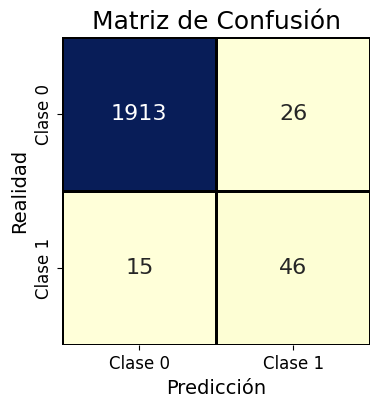

In [12]:
# Calcular la matriz de confusión
cm2 = confusion_matrix(y_test, y_pred)

# Crear la gráfica de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'],
            cbar=False, linewidths=1, linecolor='black', square=True, annot_kws={"size": 16})

# Títulos y etiquetas
plt.title('Matriz de Confusión', fontsize=18)
plt.xlabel('Predicción', fontsize=14)
plt.ylabel('Realidad', fontsize=14)

# Ajustar el tamaño de la fuente en los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

In [13]:
# Extraer valores de la matriz de confusión
TN2 = cm2[0, 0]  # Verdaderos Negativos
FP2 = cm2[0, 1]  # Falsos Positivos

# Calcular la especificidad
especificidad2 = TN2 / (TN2 + FP2)

# Imprimir el resultado
print(f"Especificidad: {especificidad2}")

Especificidad: 0.9865910263022176


### BOSQUES ALEATORIOS

In [14]:
#listas para almacenar resultados
resultados = {}
col_modelo = []

# Iterar sobre las columnas, acumulándolas en `col_modelo`
for col in columnas:
    col_modelo.append(col)
    
    # Crear subconjuntos de X_train y X_test usando solo las columnas actuales
    X_train_subset = X_train[col_modelo]
    X_test_subset = X_test[col_modelo]

    # Crear el modelo de Bosques Aleatorios y entrenarlo
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_subset, y_train)

    # Realizar las predicciones en el conjunto de prueba
    y_pred = rf_model.predict(X_test_subset)

    # Calcular y almacenar la precisión
    accuracy = accuracy_score(y_test, y_pred)
    resultados[tuple(col_modelo)] = accuracy

    # Imprimir el resultado de la iteración
    print(f'Columnas usadas: {col_modelo}, Exactitud: {accuracy:.4f}')

Columnas usadas: ['Type_H'], Exactitud: 0.9695
Columnas usadas: ['Type_H', 'Type_L'], Exactitud: 0.9695
Columnas usadas: ['Type_H', 'Type_L', 'Type_M'], Exactitud: 0.9695
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]'], Exactitud: 0.9695
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]'], Exactitud: 0.9595
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]'], Exactitud: 0.9780
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]'], Exactitud: 0.9815
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], Exactitud: 0.9820


In [15]:
# Evaluar la precisión en el conjunto de entrenamiento
train_accuracy3 = accuracy_score(y_train, rf_model.predict(X_train))
print(f"Accuracy del entrenamiento : {train_accuracy3*100:.2f} %")

# Realizar las predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluar la precisión en el conjunto de prueba
test_accuracy3 = accuracy_score(y_test, y_pred)
print(f"Accuracy del algoritmo: {test_accuracy3*100:.2f} %")

# Imprimir el informe de clasificación
print("\nInforme de clasificación :")
class_report3 = classification_report(y_test, y_pred, output_dict=True)

# Convertir el informe de clasificación en un DataFrame de pandas
report_df3 = pd.DataFrame(class_report3).transpose()

# Mostrar solo las métricas de las clases (eliminamos la fila 'accuracy')
report_df3 = report_df3.drop('accuracy', axis=0)

# Imprimir el resumen con las métricas por clase en formato de tabla
report_df3

Accuracy del entrenamiento : 100.00 %
Accuracy del algoritmo: 98.20 %

Informe de clasificación :


,precision,recall,f1-score,support
0,0.984717,0.996906,0.990774,1939.0
1,0.837838,0.508197,0.632653,61.0
macro avg,0.911278,0.752551,0.811714,2000.0
weighted avg,0.980237,0.982000,0.979851,2000.0


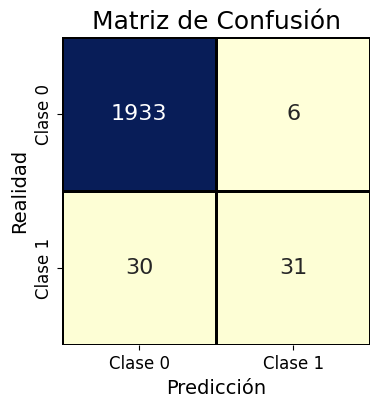

In [16]:
# Calcular la matriz de confusión
cm3 = confusion_matrix(y_test, y_pred)

# Crear la gráfica de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm3, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'],
            cbar=False, linewidths=1, linecolor='black', square=True, annot_kws={"size": 16})

# Títulos y etiquetas
plt.title('Matriz de Confusión', fontsize=18)
plt.xlabel('Predicción', fontsize=14)
plt.ylabel('Realidad', fontsize=14)

# Ajustar el tamaño de la fuente en los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

In [17]:
# Extraer valores de la matriz de confusión
TN3 = cm3[0, 0]  # Verdaderos Negativos
FP3 = cm3[0, 1]  # Falsos Positivos

# Calcular la especificidad
especificidad3 = TN3 / (TN3 + FP3)

# Imprimir el resultado
print(f"Especificidad: {especificidad3}")

Especificidad: 0.9969056214543579


### GRADIENT BOOSTING MACHINES (GBM)

In [18]:
# Listas para almacenar resultados
resultados = {}
col_modelo = []

# Iterar sobre las columnas, acumulándolas en `col_modelo`
for col in columnas:
    col_modelo.append(col)
    
    # Crear subconjuntos de X_train y X_test usando solo las columnas actuales
    X_train_subset = X_train[col_modelo]
    X_test_subset = X_test[col_modelo]

    # Crear el modelo de Gradient Boosting y entrenarlo
    gbm_model = GradientBoostingClassifier(random_state=42)  
    gbm_model.fit(X_train_subset, y_train)

    # Realizar las predicciones en el conjunto de prueba
    y_pred = gbm_model.predict(X_test_subset)

    # Calcular y almacenar la precisión
    accuracy = accuracy_score(y_test, y_pred)
    resultados[tuple(col_modelo)] = accuracy

    # Imprimir el resultado de la iteración
    print(f'Columnas usadas: {col_modelo}, Exactitud: {accuracy:.4f}')

Columnas usadas: ['Type_H'], Exactitud: 0.9695
Columnas usadas: ['Type_H', 'Type_L'], Exactitud: 0.9695
Columnas usadas: ['Type_H', 'Type_L', 'Type_M'], Exactitud: 0.9695
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]'], Exactitud: 0.9695
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]'], Exactitud: 0.9685
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]'], Exactitud: 0.9735
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]'], Exactitud: 0.9780
Columnas usadas: ['Type_H', 'Type_L', 'Type_M', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], Exactitud: 0.9835


In [19]:
# Evaluar la precisión en el conjunto de entrenamiento
train_accuracy4= accuracy_score(y_train, gbm_model.predict(X_train_subset))
print(f"Accuracy del entrenamiento : {train_accuracy4*100:.2f} %")

# Realizar las predicciones en el conjunto de prueba
y_pred_gbm = gbm_model.predict(X_test_subset)

# Evaluar la precisión en el conjunto de prueba
test_accuracy4 = accuracy_score(y_test, y_pred_gbm)
print(f"Accuracy del algoritmo: {test_accuracy4*100:.2f} %")

# Imprimir el informe de clasificación
print("\nInforme de clasificación :")
class_report_gbm = classification_report(y_test, y_pred_gbm, output_dict=True)

# Convertir el informe de clasificación en un DataFrame de pandas
report_df4 = pd.DataFrame(class_report_gbm).transpose()

# Mostrar solo las métricas de las clases (eliminamos la fila 'accuracy')
report_df4 = report_df4.drop('accuracy', axis=0)

# Imprimir el resumen con las métricas por clase en formato de tabla
report_df4

Accuracy del entrenamiento : 99.17 %
Accuracy del algoritmo: 98.35 %

Informe de clasificación :


,precision,recall,f1-score,support
0,0.986721,0.99639,0.991532,1939.0
1,0.833333,0.57377,0.679612,61.0
macro avg,0.910027,0.78508,0.835572,2000.0
weighted avg,0.982043,0.98350,0.982018,2000.0


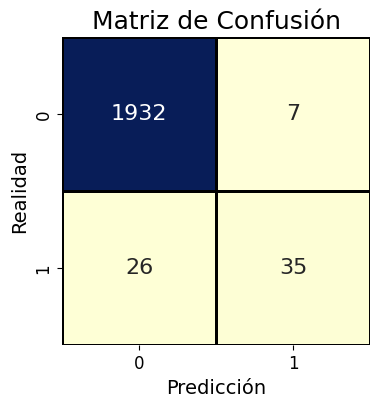

In [20]:
# Calcular la matriz de confusión con el Algoritmo de Gradient Boosting
cm4 = confusion_matrix(y_test, y_pred_gbm)  # Asegúrate de usar y_pred_gbm para el Algoritmo de Gradient Boosting

# Crear la gráfica de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm4, annot=True, fmt='d', cmap='YlGnBu', xticklabels=gbm_model.classes_, yticklabels=gbm_model.classes_,
            cbar=False, linewidths=1, linecolor='black', square=True, annot_kws={"size": 16})

# Títulos y etiquetas
plt.title('Matriz de Confusión', fontsize=18)
plt.xlabel('Predicción', fontsize=14)
plt.ylabel('Realidad', fontsize=14)

# Ajustar el tamaño de la fuente en los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

In [21]:
# Extraer valores de la matriz de confusión
TN4 = cm4[0, 0]  # Verdaderos Negativos
FP4 = cm4[0, 1]  # Falsos Positivos

# Calcular la especificidad
especificidad4 = TN4 / (TN4 + FP4)

# Imprimir el resultado
print(f"Especificidad: {especificidad4}")

Especificidad: 0.9963898916967509


In [22]:
# Crear el DataFrame usando los valores ya existentes
df = pd.DataFrame({
    'Algoritmo': ['Regresion Logistica', 'Arbol de descisiones', 'Bosques Aleatorios', 'Gradient Boosting Machines'],
    'Precisión Entrenamiento (%)': [train_accuracy1, train_accuracy2, train_accuracy3, train_accuracy4],
    'Precisión Prueba (%)': [test_accuracy1, test_accuracy2, test_accuracy3, test_accuracy4]
})

# Mostrar la tabla sin índice
df

,Algoritmo,Precisión Entrenamiento (%),Precisión Prueba (%)
0,Regresion Logistica,0.96925,0.9740
1,Arbol de descisiones,1.00000,0.9795
2,Bosques Aleatorios,1.00000,0.9820
3,Gradient Boosting Machines,0.99175,0.9835


In [23]:
# Añadir una columna para identificar el Algoritmo en cada DataFrame
report_df1['Informe de clasificación'] = 'Regresion Logistica'
report_df2['Informe de clasificación'] = 'Arbol de descisiones'
report_df3['Informe de clasificación'] = 'Bosques Aleatorios'
report_df4['Informe de clasificación'] = 'Gradient Boosting Machine'

# Concatenar los DataFrames en uno solo
report_df_concatenado = pd.concat([report_df1, report_df2, report_df3, report_df4])

# Reordenar para que la columna 'Informe de clasificación' esté al inicio
report_df_concatenado = report_df_concatenado.reset_index().set_index(['Informe de clasificación', 'index'])

# Mostrar el DataFrame concatenado
report_df_concatenado

precision    recall  f1-score  support
Informe de clasificación  index                                               
Regresion Logistica       0              0.978206  0.995358  0.986708   1939.0
                          1              0.666667  0.295082  0.409091     61.0
                          macro avg      0.822436  0.645220  0.697899   2000.0
                          weighted avg   0.968704  0.974000  0.969090   2000.0
Arbol de descisiones      0              0.992220  0.986591  0.989397   1939.0
                          1              0.638889  0.754098  0.691729     61.0
                          macro avg      0.815554  0.870345  0.840563   2000.0
                          weighted avg   0.981443  0.979500  0.980319   2000.0
Bosques Aleatorios        0              0.984717  0.996906  0.990774   1939.0
                          1              0.837838  0.508197  0.632653     61.0
                          macro avg      0.911278  0.752551  0.811714   2000.0
                          weighted avg   0.980237  0.982000  0.979851   2000.0
Gradient Boosting Machine 0              0.986721  0.996390  0.991532   1939.0
                          1              0.833333  0.573770  0.679612     61.0
                          macro avg      0.910027  0.785080  0.835572   2000.0
                          weighted avg   0.982043  0.983500  0.982018   2000.0

In [24]:
import joblib
# Guardar los Algoritmos entrenados en archivos
joblib.dump(log_reg, 'Algoritmo_regresion_logistica1.pkl')  # Regresión Logística
joblib.dump(tree_model, 'Algoritmo_arboles1.pkl')  # Árboles de Decisión
joblib.dump(rf_model, 'Algoritmo_bosques1.pkl')  # Bosques Aleatorios
joblib.dump(gbm_model, 'Algoritmo_gbm1.pkl')  # GBM

['Algoritmo_gbm1.pkl']

In [25]:
# Guardar X_test y y_test en archivos para uso futuro
with open('X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)

with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)

print("X_test y y_test han sido guardados en archivos pkl.")

# Guardar X_test y y_test en un archivo Excel
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)

with pd.ExcelWriter('test_data.xlsx') as writer:
    X_test_df.to_excel(writer, sheet_name='X_test', index=False)
    y_test_df.to_excel(writer, sheet_name='y_test', index=False)

print("X_test y y_test han sido guardados en 'test_data.xlsx'.")

X_test y y_test han sido guardados en archivos pkl.
X_test y y_test han sido guardados en 'test_data.xlsx'.
